# SPRING 2022 CMPE 462 PROJECT PHASE 3
#### Mehmet Selahaddin ŞENTOP - Halil Burak PALA
_Please run with Python 3.9.5 ._

## Question 1: _Support Vector Machine_

### Part 1.a)
The $Q$ matrix that we see in the lectures was:
$$
Q = \begin{bmatrix}
0 & \textbf{0}_d^T \\
\textbf{0}_d & \textbf{I}_d
\end{bmatrix}
$$
where $d$ is the dimensionality of the weight vector.

To prove positive semi-definiteness, we can use eigenvalues. If all of the eigenvalues of this $Q$ matrix are nonnegative, then we can say that this matrix is _positive semi-definite_.

To find its eigenvalues, first find the matrix $Q-\lambda \textbf{I}$:

$$
Q-\lambda \textbf{I} = 
\begin{bmatrix}
0 & \textbf{0}_d^T \\
\textbf{0}_d & \textbf{I}_d
\end{bmatrix}
- 
\begin{bmatrix}
\lambda & \textbf{0}_d^T \\
\textbf{0}_d & \lambda \textbf{I}_d
\end{bmatrix}
=
\begin{bmatrix}
-\lambda & \textbf{0}_d^T \\
\textbf{0}_d & (1-\lambda) \textbf{I}_d
\end{bmatrix}
$$

Here is the determinant of $Q-\lambda \textbf{I}$:
$$
det(Q-\lambda \textbf{I}) = 
\begin{vmatrix}
-\lambda & \textbf{0}_d^T \\
\textbf{0}_d & (1-\lambda) \textbf{I}_d
\end{vmatrix}
= (-\lambda)(1-\lambda)^d
$$

Values making this expression 0 are the eigenvalues:
$$
(-\lambda)(1-\lambda)^d = 0 \implies \lambda = 0 \lor \lambda = 1
$$

As we can see, all of the eigenvalues of this $Q$ matrix are nonnegative. So, it is __positive semi-definite__.

### Part 1.b)
Here is the primal QP formulation of SVM:
$$
\text{min } \frac{1}{2}\textbf{w}^T\textbf{w} \\
\text{s.t. } y_n(\textbf{w}^T x_n + b) \geq 1, n = 1,2,3
$$
where $\textbf{w}$ is the weight vector $\begin{bmatrix}
w_1 \\
w_2 
\end{bmatrix}$, $b$ is the bias, $x_n$s are input points, $y_n$s are the labels for respectice $x_n$s.

So, for our case the problem becomes:
$$
\text{min } \frac{1}{2}(w_1^2 + w_2^2) \\
\text{s.t. } -1 \cdot (w_1 \cdot 0 + w_2 \cdot 0 + b) \geq 1 \text{ (1) }\\
-1 \cdot (w_1 \cdot 0 + w_2 \cdot (-1) + b) \geq 1 \text{ (2) }\\
1 \cdot (w_1 \cdot (-2) + w_2 \cdot 0 + b) \geq 1 \text{ (3) }\\
$$

Simplify:
$$
\text{min } \frac{1}{2}(w_1^2 + w_2^2) \\
\text{s.t. } -b \geq 1 \\
w_2 -b \geq 1 \\
-2 w_1 + b \geq 1 \\
$$

So, we can write our Lagrangian:
$$
L = \frac{1}{2}(w_1^2+w_2^2)+\alpha_1(1+b)+\alpha_2(1-w_2+b)+\alpha_3(1+2w_1-b)
$$

Taking partial dervatives and equating to 0:
$$
\frac{\partial L}{\partial w_1} = w_1 + 2\alpha_3 = 0 \\
\frac{\partial L}{\partial w_2} = w_2 - \alpha_2 = 0 \\
\frac{\partial L}{\partial b} = \alpha_1 + \alpha_2 - \alpha_3 = 0 \\
$$

These equations give:
$$
w_1 = -2\alpha_3 \\
w_2 = \alpha_2 \\
\alpha_1 = \alpha_3 - \alpha_2 \\
$$

Rewriting the Lagrangian:
$$
L = \frac{1}{2}(4\alpha_3^2+\alpha_2^2)+(\alpha_3-\alpha_2)(1+b)+\alpha_2(1-\alpha_2+b)+\alpha_3(1-4\alpha_3-b)
$$

After simplifying this expression, we get:
$$
L = -2\alpha_3^2 - \frac{\alpha_2^2}{2} + 2\alpha_3
$$

Taking partial derivatives and equating them to 0:
$$
\frac{\partial L}{\alpha_2} = -\alpha_2 = 0\\
\frac{\partial L}{\alpha_3} = -4\alpha_3 + 2 = 0
$$

So, by using these information, we can infer that:
$$
\alpha_1 = \alpha_3 - \alpha2 = \frac{1}{2} \\
\alpha_2 = 0 \\
\alpha_3 = \frac{1}{2} \\
w_1 = -2\alpha_3 = -1 \\
w_2 = \alpha_2 = 0
$$

To find $b$, we reconsider our constraints of the primal QP formulation:
$$
-b \geq 1 \implies b \leq -1 \text{ (1) } \\
0 - b \geq 1 \implies b \leq -1 \text{ (2) } \\
2 + b \geq 1 \implies b \geq -1 \text{ (3) } 
$$

$(1)$, $(2)$ and $(3)$ together gives that $b = -1$. So,
$$
\textbf{w}=\begin{bmatrix}
w_1 \\
w_2 
\end{bmatrix} =
\begin{bmatrix}
-1 \\
0 
\end{bmatrix} \\
b = -1
$$

Here is the plot of our decision boundary:

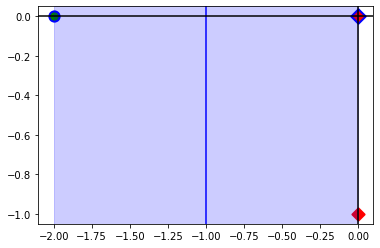

In [1]:
import numpy as np
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.scatter([0], [0], linewidths = 2, c="red", marker ="D", edgecolor ="blue", s = 105)

ax.scatter([0], [-1], linewidths = 2, c="red", marker ="D", s = 75)

ax.scatter([-2], [0], linewidths = 2, c="green", marker ="o", edgecolor ="blue", s = 105)

ax.axvline(x=0, c="black", label="x=0")
ax.axvline(x=-1, c="blue", label="x=-1")
ax.axhline(y=0, c="black", label="y=0")

ax.axvspan(-2, 0, alpha=0.2, color='blue')
plt.show()

Blue line represents the decision boundary. Blue area represents the margin. Green dots represent positive class points, red diamonds represent negative class points, points with blue edge represent the support vectors. 

Equation of our decision boundary is $x_1 = -1$.

Our support vectors are $\begin{bmatrix} -2 \\ 0 \end{bmatrix}$ and $\begin{bmatrix} 0 \\ 0 \end{bmatrix}$.

### Part 1.c)
#### Defining a Generic SVM Problem By CVXOPT
CVXOPT library is able to solve quadratic programming problems which are in form:
$$
\text{min } \frac{1}{2}\textbf{x}^T \textbf{P} \textbf{x} + \textbf{q}^T \textbf{x} \\
\text{s. t. } \textbf{G}\textbf{x} \leq \textbf{h} \\
\textbf{A}\textbf{x} = \textbf{b}
$$
For more info, check [this link](https://cvxopt.org/userguide/coneprog.html#quadratic-programming).

As we know from our lectures, dual form of the QP formulation of SVM is:
$$
\text{max }_{\alpha \in \mathbf{R}^N} \sum_{n=1}^{N} \alpha_n - \frac{1}{2} \sum_{n=1}^{N} \sum_{m=1}^{N}y_n y_m \alpha_n \alpha_m \textbf{x}_n^T \textbf{x}_m \\
\text{s. t. }  \sum_{n=1}^{N} y_n \alpha_n = 0 \\
\alpha_n \geq 0, n=1,...,N
$$

To implement SVM using cvxopt, we should convert this SVM problem to an appropriate form which obeys cvxopt's format.

Let $\textbf{H}$ be a matrix such that $\textbf{H}_{n,m} = y_n y_m \textbf{x}_n^T \textbf{x}_m $. Then the SVM optimization problem becomes:
$$
\text{max }_{\alpha \in \mathbf{R}^N} \sum_{n=1}^{N} \alpha_n - \frac{1}{2} \alpha^T \textbf{H} \alpha \\
\text{s. t. }  \sum_{n=1}^{N} y_n \alpha_n = 0 \\
\alpha_n \geq 0, n=1,...,N
$$

To turn this problem into a minimization, multiply by -1:
$$
\text{min }_{\alpha \in \mathbf{R}^N} \frac{1}{2} \alpha^T \textbf{H} \alpha - \textbf{1}^T \alpha \\
\text{s. t. }  y^T \alpha = 0 \\
-\alpha \leq 0
$$

So, the matrices in the cvxopt documentation for our case are:
- $\textbf{P} = \textbf{H}_{N \times N}$
- $\textbf{q} = -\vec{\textbf{1}}_{N \times 1}$ (- 1 vector)
- $\textbf{G} = -\textbf{I}_N $ (- NxN identity matrix) 
- $\textbf{h} = -\vec{\textbf{0}}_{N \times 1}$ (zero matrix)
- $\textbf{A} = \textbf{y}_{N \times 1}$ (label vector)
- $\textbf{b} = 0$ (scalar 0)

#### Solving (b) by CVXOPT
So in our case, since $N=3$, $\textbf{q}=\begin{bmatrix} -1\\ -1 \\ -1 \end{bmatrix}$, $\textbf{G} = \begin{bmatrix} -1 & 0 & 0 \\ 0 & -1 & 0 \\ 0 & 0 & -1 \end{bmatrix}$, and $\textbf{h} = \begin{bmatrix} 0\\ 0 \\ 0 \end{bmatrix}$.
To compute $\textbf{H}$ matrix, consider a new matrix $\textbf{X}'$ where each input sample $x$ is multiplied by the corresponding output label $y$:
$$
\textbf{X}'= \begin{bmatrix}
x_{1,1}\cdot y_1 & x_{1,2}\cdot y_1\\
x_{2,1}\cdot y_2 & x_{2,2}\cdot y_2 \\
x_{3,1}\cdot y_3 & x_{3,2}\cdot y_3
\end{bmatrix}
$$

where $x_{i,j}$ represents $x_i$'s $j$th entry, e.g. $x_{3,1}$ denotes $-2$ in our case.

So, we can get $\textbf{H}$ by mutliplying $\textbf{X}'$ by its transpose:
$$
\textbf{H} = \textbf{X}'\cdot \textbf{X}'^T
$$

Here is the solution by using cvxopt:

In [2]:
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

def svm_cvxopt(X,y):
    # Initializing values: (Note the 1. to force to float type)
    m,n = X.shape
    X_dash = y * X
    H = np.dot(X_dash,X_dash.T) * 1.0

    # Converting into cvxopt format:
    P = cvxopt_matrix(H)
    q = cvxopt_matrix(-np.ones((m, 1)))
    G = cvxopt_matrix(-np.eye(m))
    h = cvxopt_matrix(np.zeros(m))
    A = cvxopt_matrix(y.reshape(1, -1))
    b = cvxopt_matrix(np.zeros(1))

    # Setting solver parameters 
    cvxopt_solvers.options['show_progress'] = False
    cvxopt_solvers.options['abstol'] = 1e-20
    cvxopt_solvers.options['reltol'] = 1e-20
    cvxopt_solvers.options['feastol'] = 1e-20

    # Run solver
    sol = cvxopt_solvers.qp(P, q, G, h, A, b)
    alphas = np.array(sol['x'])
    #w parameter in vectorized form
    w = ((y * alphas).T @ X).reshape(-1,1)

    #Selecting the set of indices S corresponding to non zero parameters
    S = (alphas > 1e-5).flatten()

    #Computing b
    b = y[S] - np.dot(X[S], w)

    return alphas.T, w.flatten(), b[0]

In [3]:
X = np.array([[0,0],[0,-1],[-2,0]])
y = np.array([[-1],[-1],[1]]) * 1.

alphas, w, b = svm_cvxopt(X,y)

#Display results
print('Alphas = ',alphas)
print('w = ', w)
print('b = ', b)

Alphas =  [[5.00000000e-01 1.29461755e-17 5.00000000e-01]]
w =  [-1.00000000e+00  1.29461755e-17]
b =  [-1.]


As we can see, this values are consistent with our manual solution. ($\alpha_2$ and $w_2$ are not exactly 0 but very close to 0 due to floating point operations.)

### Part 1.d)

Here, training and test data is created from the 3d shapes images dataset. (These code snippets are from Phase 1. For more detailed information about the extraction of the data from the images, please refer to Phase 1.)

Creating the training data:

In [4]:
from PIL import Image
import os, re
from sklearn import preprocessing

orientations_train = np.load('orientations_train.npy') # Labels of the training set images

# Empty numpy array to store the flattened gray scale training set images:
flattened_grayscale_train = np.zeros(shape=(10000, 4096))   

# Looping through all training set image files
for file in sorted(os.listdir('3dshapes_train'), key=lambda f: int(re.sub('\D', '', f))): 
    
    file_path = os.path.join('3dshapes_train', file)
    
    # Conversion to gray scale:
    grayscale_img = Image.open(file_path).convert('L') 
    
    # Conversion of gray scale image to flattened numpy array:
    flattened_grayscale_img = np.array(grayscale_img.getdata(), dtype=np.uint8) 
        
    # Adding the flattened gray scale image to the array of images initialized before the loop:
    flattened_grayscale_train[int(file.split('.')[0])] = flattened_grayscale_img # 10000 x 4096 array

scaler1 = preprocessing.StandardScaler() # Scaler which will be used for standardising the data for optimal performance
scaler1.fit(flattened_grayscale_train) # Computing the mean and std for standardisations below
X_train = scaler1.transform(flattened_grayscale_train)

Creating the test data:

In [5]:
# Labels of the test set images:
orientations_test = np.load('orientations_test.npy')

# Empty numpy array to store the flattened gray scale test set images:
flattened_grayscale_test = np.zeros(shape=(1000, 4096))

# Looping through all test set image files:
for file in sorted(os.listdir('3dshapes_test'), key=lambda f: int(re.sub('\D', '', f))):
    file_path = os.path.join('3dshapes_test', file)
    
    # Conversion to gray scale:
    grayscale_img = Image.open(file_path).convert('L')
    
    # Conversion of gray scale image to flattened numpy array:
    flattened_grayscale_img = np.array(grayscale_img.getdata(), dtype=np.uint8)
    
    # Adding the flattened gray scale image to the array of images initialized before the loop:
    flattened_grayscale_test[int(file.split('.')[0])] = flattened_grayscale_img # 1000 x 4096 array

X_test = scaler1.transform(flattened_grayscale_test)

Now we have X_train which is a 10000x4096 ndarray, orientations_train which is a vector of length 10000, X_test which is a 1000x4096 ndarray and orientations_test which is a vector of length 1000.

Here is the all available labels in this dataset:

In [6]:
set(orientations_train)

{-30.0,
 -25.714285714285715,
 -21.42857142857143,
 -17.142857142857142,
 -12.857142857142858,
 -8.571428571428573,
 -4.285714285714285,
 0.0,
 4.285714285714285,
 8.57142857142857,
 12.857142857142854,
 17.14285714285714,
 21.42857142857143,
 25.714285714285715,
 30.0}

To construct a binary classification problem, we are going to consider only two classes in our dataset. So, we considered data points with class -30 and 30. We assumed class -30 as -1, class 30 as 1.

In [7]:
bool_index = (orientations_train == -30) | (orientations_train == 30) # Boolean index indicating data labels -30 and 30
X_1d = X_train[bool_index] # Data points with class label -30 or 30.
y_1d = np.sign(orientations_train[bool_index]).reshape(-1,1) * 1. # Data labels: -1 for -30, 1 for 30.

In [8]:
alphas_1d, w_1d, b_1d = svm_cvxopt(X_1d, y_1d) # SVM classifier using cvxopt

In [9]:
# Our weight vector:
w_1d

array([ 0.        ,  0.        ,  0.        , ..., -0.00038057,
       -0.00045076, -0.00052748])

In [10]:
# Shape of the weight vector:
w_1d.shape

(4096,)

In [11]:
# Our bias:
b_1d

array([-0.01297866])

In [12]:
# To test this model, we are going to use test data. The same procedure we 
# applied to the training data is applied also to the test data:
bool_index_test = (orientations_test == -30) | (orientations_test == 30)
X_1d_test = X_test[bool_index_test]
y_1d_test = np.sign(orientations_test[bool_index_test]).reshape(-1,1) * 1.

In [13]:
# Sign function:
prediction_1d = np.sign(np.dot(X_1d_test, w_1d) + b_1d).reshape(-1,1)
print(prediction_1d.reshape(1,-1)) # Our prediction for the class labels

[[ 1.  1. -1.  1.  1.  1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1.  1. -1.
  -1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1.  1.
  -1. -1. -1.  1.  1.  1. -1.  1. -1. -1. -1.  1. -1. -1. -1.  1. -1.  1.
  -1.  1. -1.  1. -1.  1. -1.  1.  1. -1.  1. -1.  1.  1.  1.  1.  1. -1.
  -1. -1.  1. -1.  1.  1. -1. -1. -1.  1. -1. -1.  1. -1.  1.  1.  1. -1.
  -1. -1.  1.  1.  1. -1.  1. -1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1.
   1.  1. -1. -1.  1.  1.  1.  1. -1. -1. -1.  1.]]


In [14]:
y_1d_test.reshape(1,-1) # Here is the actual class labels

array([[ 1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,
         1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.,
        -1., -1., -1., -1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1.,
         1.,  1.,  1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1.,  1.,
        -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1.,
        -1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,
        -1., -1., -1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,
        -1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,
        -1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1.,
        -1., -1.,  1.]])

In [15]:
# Function to get accuracy:
def getAccuracy(prediction, actual):
    nofCorrectPredictions = 0
    for i in range(len(prediction)):
        if prediction[i] == actual[i]:
            nofCorrectPredictions += 1
    accuracy = (nofCorrectPredictions / len(prediction))
    return accuracy

In [16]:
#Here is the model accuracy for these classes:
print("Prediction accuracy: {:.2%}".format(getAccuracy(prediction_1d,y_1d_test)))

Prediction accuracy: 100.00%


This classifier perfectly classified every point in the test data set.

### Challanges met while using CVXOPT
While using cvxopt, determining the values of the solver parameters was a bit confusing. We could not fully understand the meaning of these parameters. Other than that, we did not encounter a challange.

### Part 1.e)

In [17]:
from sklearn import svm
model_1e = svm.SVC()
model_1e.fit(X_1d,np.ravel(y_1d)) # Trained an SVM model by using training data

SVC()

In [18]:
prediction_1e = model_1e.predict(X_1d_test) # Get predictions for the labels of the test data.
print(prediction_1e) # Here is the predicted lables:

[ 1.  1. -1.  1.  1.  1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1.  1. -1.
 -1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1.  1.
 -1. -1. -1.  1.  1.  1. -1.  1. -1. -1. -1.  1. -1. -1. -1.  1. -1.  1.
 -1.  1. -1.  1. -1.  1. -1.  1.  1. -1.  1. -1.  1.  1.  1.  1.  1. -1.
 -1. -1.  1. -1.  1.  1. -1. -1. -1.  1. -1. -1.  1. -1.  1.  1.  1. -1.
 -1. -1.  1.  1.  1. -1.  1. -1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1.
  1.  1. -1. -1.  1.  1.  1.  1. -1. -1. -1.  1.]


In [19]:
print("Prediction accuracy: {:.2%}".format(getAccuracy(prediction_1e,y_1d_test)))

Prediction accuracy: 100.00%


The model again correctly classified every data point in the test data.

#### SVM Implementation of scikit-learn
Scikit learn has three classes, __SVC__, __NuSVC__ and __LinearSVC__, for performing binary and multi class classification using SVM. SVC and NuSVC are similar but have slightly different sets of parameters. LinearSVC is used for training only Linear SVM models and it has no other kernel option. In this implementation, we used __SVC__ class.

While training a model, we need to use __fit()__ function. This function of SVC takes as input two arrays: X of shape (n_samples, n_features) holding the training samples, and an array y of class labels (strings or integers), of shape (n_samples). We can also give kernel as an input parameter. Kernel can be one of the following: 'linear', 'poly', 'rbf', 'sigmoid'. By default it is set to 'rbf'.

For multi-class classification, SVC and NuSVC uses one-vs-one approach.  In total, n_classes * (n_classes - 1) / 2 classifiers are constructed and each one trains data from two classes. On the other hand, LinearSVC uses one-vs-rest approach. Thus, it trains n_classes models. 

### Part 1.f)

In [20]:
# Since sklearn does not accept floating point class labels, we encoded them:
lab_enc = preprocessing.LabelEncoder()
encoded_train = lab_enc.fit_transform(orientations_train)

# Here is the training: (It takes some time since our train data have 4096 features.)
model_1f = svm.SVC()
model_1f.fit(X_train,encoded_train) # Here is the SVM model for this part

SVC()

Here is the test results:

In [21]:
prediction_1f = model_1f.predict(X_test)
encoded_test = lab_enc.fit_transform(orientations_test)
print("Prediction accuracy: {:.2%}".format(getAccuracy(prediction_1f,encoded_test)))

Prediction accuracy: 98.70%


Scikit learn uses RBF kernel by default while training an SVM model.

If we use a linear kernel instead:

In [22]:
# SVM with Linear Kernel
model_1f_linear_kernel = svm.SVC(kernel='linear')
model_1f_linear_kernel.fit(X_train, encoded_train)

prediction_1f_linear_kernel = model_1f_linear_kernel.predict(X_test)
print("Prediction accuracy: {:.2%}".format(getAccuracy(prediction_1f_linear_kernel,encoded_test)))

Prediction accuracy: 100.00%


Prediction accuracy of the test data is increased.

The training of the model took a long time in that case since there are 4096 features and SVC class uses one-vs-one approach for multiclass classification.

### Part 1.g)
Now let us apply PCA to get most significant features to preserve 95% of the variance:

In [23]:
from sklearn.decomposition import PCA

# Applying PCA so that we preserve at least 95% of the variance of all 4096 features. 
pca = PCA(.95)
pca.fit(X_train) # Fitting our PCA model to the training set

print('Number of features required to preserve at least 95% of the variations is', pca.n_components_)

# Applying the transformation to the training set using the PCA model we created:
X_train_pca = pca.transform(X_train)

# Applying the transformation to the test set using the PCA model we created:
X_test_pca = pca.transform(X_test)

Number of features required to preserve at least 95% of the variations is 66


Now train an SVM classifier:

In [24]:
model_1g = svm.SVC()
model_1g.fit(X_train_pca,encoded_train) # Here is the SVM model for this part

SVC()

In [25]:
prediction_1g = model_1g.predict(X_test_pca)
print("Prediction accuracy: {:.2%}".format(getAccuracy(prediction_1g,encoded_test)))

Prediction accuracy: 95.70%


We lost about 7% accuracy when we used RBF kernel.

If we use a linear kernel:

In [26]:
# SVM with Linear Kernel
model_1g_linear_kernel = svm.SVC(kernel='linear')
model_1g_linear_kernel.fit(X_train_pca, encoded_train)

prediction_1g_linear_kernel = model_1g_linear_kernel.predict(X_test_pca)
print("Prediction accuracy: {:.2%}".format(getAccuracy(prediction_1g_linear_kernel,encoded_test)))

Prediction accuracy: 99.90%


We still can get a high accuracy and also training the model takes much less time. We experienced a huge improvement in performance.

### Part 1.h)

Here are the results of the 4 classifier for test data: \
Test classification accuracy of Linear Regression is 95.10% (Without dimension reduction and after accepting the predictions within 0.01 distance to the actual values) \
Test classification accuracy of Naive Bayes is 77.60% \
Test classification accuracy of Logistic Regression is 92.90% \
Test classification accuracy of SVM is 100.00%

We had other variations of above classifiers too, but these results are for the ones which gave the best performance. We can see that the Linear Regression classifier was very successful, giving a better performance than Logistic Regression. It is not a surprise that Naive Bayes performed worse than others since the parameters were not conditionally independent. As for the best one, SVM was flawlessly the best performing classifier in accordance with our theoretical knowledge.

## Question 2: _k-Means Clustering and Gaussian Mixture Models_

### Part 2.a)

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [28]:
mean_values = [np.array([0, 1]), np.array([1, 0]), np.array([-1, 0]), np.array([0, -1])] # Means of the Gaussians
covariance_values = [np.array([[1, 0], [0, 1]]), np.array([[1, 0], [0, 1]]), np.array([[1, 0], [0, 1]]), np.array([[1, 0], [0, 1]])] # Covariances of the Gaussians
pi_values = np.array([0.25, 0.25, 0.25, 0.25]) # Probability coefficients of the Gaussians

In [29]:
samples_500_clustered = dict() # Dictionary of clusters based on Gaussians so that we can compare the plot with the plot of the result of K-means algorithm
samples_500 = [] # List of all points which will be used for K-means clustering
for i in range(4):
    samples_500_clustered[i] = [] # Initialize list of clusters
for i in range(500):
    r = np.random.uniform(0, 1) # Sample a uniform random variable between 0 and 1
    index = int(r // 0.25) # Select a Gaussian based on the sampled random variable
    lambda_, gamma_ = np.linalg.eig(covariance_values[index]) # Find eigenvector decomposition for diagonalization
    random_uniform = np.random.uniform(0, 1, size=(2, 50)) # Choose 50 samples to normalize x so that we reduce the std
    random_normal = np.mean(np.log(random_uniform/(1-random_uniform)), axis=1).reshape((-1, 2)) # Normalizing the samples and reshaping to give 2D points
    random_multi = ((random_normal*lambda_) @ gamma_ + mean_values[index])[0] # Finally getting multivariate normal distribution samples using diagonalization
    samples_500_clustered[index].append(random_multi)
    samples_500.append(random_multi)

In [30]:
# Helper function to plot the clusters so that points in different clusters have different color
def print_plot(data):
    colors = {0:'red', 1:'green', 2:'blue', 3:'orange', 4:'black', 5:'violet', 6:'yellow', 7:'grey'}
    for c in range(len(data)):
        for i in data[c]:
            plt.scatter(*i, s=10, c=colors[c], alpha=0.5)
    plt.show()

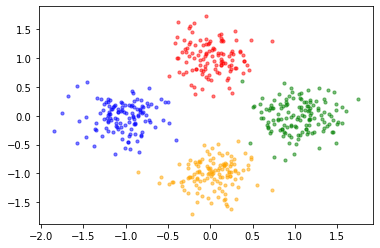

In [31]:
print_plot(samples_500_clustered)

We can observe 4 clusters from the plot above.

### Part 2.b)

In [32]:
# Helper function to initialize the centroids randomly within the enclosing rectangle whose vertices are given
def randomly_initilize_centroids(num_clusters, x_min, y_min, x_max, y_max):
    centroids = dict()
    for i in range(num_clusters):
        x = np.random.uniform(x_min, x_max) # Random x value
        y = np.random.uniform(y_min, y_max) # Random y value
        centroids[i] = [x,y]
    return centroids

# Helper function to find the sum of Euclidean distances of each point in data to the given centroid
def intra_cluster_distance(data, centroid):
    sum = 0
    for s in data:
        sum += np.sqrt((centroid[0] - s[0])**2 + (centroid[1] - s[1])**2) # Euclidean distance
    return sum

# Helper function to calculate the Euclidean distance that the centroid has been shifted for
def shift_amount(new_centroid, old_centroid, num_clusters):
    sum = 0
    for i in range(num_clusters):
        sum += np.sqrt((new_centroid[i][0] - old_centroid[i][0])**2 + (new_centroid[i][1] - old_centroid[i][1])**2) # Euclidean distance
    return sum

# Helper function to find the clusters based on the given centroids and set of points (data)
def iteration(centroids, data, num_clusters):
    centroids_clusters = dict()
    for i in range(num_clusters):
        centroids_clusters[i] = [] # Initialize empty cluster lists
    for s in data:
        min_dist = 1000000 # Initilize as a large number so that first iteration will change its value
        cluster_index = -1 # Index of the cluster in which the point s will be included
        for i in range(num_clusters):
            current_dist = np.sqrt((centroids[i][0] - s[0])**2 + (centroids[i][1] - s[1])**2) # Euclidean distance
            if current_dist < min_dist: # Update the minimum distance and index of corresponding cluster if needed
                min_dist = current_dist
                cluster_index = i
        centroids_clusters[cluster_index].append(s) # Append the point to the cluster corresponding to its closest centroid
    return centroids_clusters

# Helper function to find the index of the cluster with maximum sum of intra-cluster distances, 
# i.e. maximum overall dissimilarity
def get_max_intra_cluster_distance_index(data_multiple):
    max_dist = -1 # Initilize as a negative number so that first iteration will change its value
    max_index = -1 # Index of the cluster which has the maximum sum of intra-cluster distance
    for i in range(len(data_multiple)):
        current_dist = intra_cluster_distance(data_multiple[i][0], data_multiple[i][1])
        if current_dist > max_dist: # Update the maximum distance and index of corresponding cluster if needed
            max_dist = current_dist
            max_index = i
    return max_index

# Helper function to vertices of the smallest rectangle containing all points 
# in the cluster, so that we can randomly select the centroid within the rectangle
def get_min_max_in_cluster(cluster):
    x_min, y_min = np.min(cluster, axis=0)
    x_max, y_max = np.max(cluster, axis=0)
    return x_min, y_min, x_max, y_max

In [33]:
# Algorithm of bisecting K-means (we tried plain K-means algorithm as well but its performance highly 
# depends on the initialization of centroids, which fails to create 4 clusters in some cases)
def bisecting_k_means(K, data):
    num_clusters = 1 # Counting the number of clusters at the moment
    ITER_COUNT = 100 # This is the number of iterations we make for bisecting the selected cluster
    current_clusters_and_centroids = dict() # Stores the clusters we have at the moment with their centroids
    current_clusters_and_centroids[0] = [data, np.mean(data, axis=0)] # Initializes the cluster consisting of all data points as well as the centroid of the cluster
    while num_clusters < K: # As long as there are less than K clusters, we keep bisecting
        bisecting_index = get_max_intra_cluster_distance_index(current_clusters_and_centroids) # Get the index of the cluster with maximum sum of intra-cluster distances
        bisecting_cluster = current_clusters_and_centroids[bisecting_index][0] # Select the cluster which will be bisected based on the index we found above
        del current_clusters_and_centroids[bisecting_index] # Remove the cluster we are bisecting since it will be replaced by two new clusters
        x_min, y_min, x_max, y_max = get_min_max_in_cluster(bisecting_cluster) # Get the enclosing points for random centroid generation
        best_clusters_and_centroids = dict() # Keep the cluster pair with minimum total sum of intra-cluster distances
        min_sum_of_distances = 1000000 # Initilize as a large number so that first iteration will change its value
        for i in range(ITER_COUNT): # Bisecting is repeated ITER_COUNT times so that we will choose the best bisection with respect to the sum of intra-cluster distances
            new_centroids = randomly_initilize_centroids(2, x_min, y_min, x_max, y_max) # Initialize the centroids randomly
            has_empty_cluster = False # Check whether any resulting cluster is empty
            last_shift = 1000000 # Calculate the sum of Euclidean distances between the centroids of both clusters
            while last_shift > 0.001: # Continue until the centroids are almost not shifting
                centroids = copy.deepcopy(new_centroids) # Copy the last value of new_centroids so that it can be compared with the updated value
                centroids_clusters = iteration(centroids, bisecting_cluster, 2) # Detect the clusters given the centroids and the data points
                if len(centroids_clusters[0]) == 0 or len(centroids_clusters[1]) == 0:
                    has_empty_cluster = True # There is an empty cluster
                    break
                for i in range(2):
                    new_centroids[i] = np.mean(centroids_clusters[i], axis=0) # Determine the new centroids of the new clusters
                last_shift = shift_amount(new_centroids, centroids, 2)
            if has_empty_cluster: # Skip this bisection since it contains an empty cluster
                continue
            converged_centroids_clusters = iteration(new_centroids, bisecting_cluster, 2) # Update the clusters using the updated centroids
            current_sum_of_distances = 0
            for i in range(2):
                current_sum_of_distances += intra_cluster_distance(converged_centroids_clusters[i], new_centroids[i])
            if current_sum_of_distances < min_sum_of_distances: # Compare the sum of intra-cluster distances of this bisection to the minimum of the previous ones and update if needed
                min_sum_of_distances = current_sum_of_distances
            for i in range(2):
                best_clusters_and_centroids[i] = [converged_centroids_clusters[i], new_centroids[i]]
        unadded_clusters = 2 # Number of new clusters that are not added to current clusters dictionary yet
        index = 0 # Detect the first empty index in the dictionary
        while unadded_clusters > 0: # Add both new clusters to current clusters dictionary
            if index not in current_clusters_and_centroids:
                current_clusters_and_centroids[index] = best_clusters_and_centroids[2 - unadded_clusters]
                unadded_clusters -= 1
            index += 1
        num_clusters += 1 # Update the current number of clusters
    list_of_final_clusters = [current_clusters_and_centroids[cluster][0] for cluster in current_clusters_and_centroids]
    print_plot(list_of_final_clusters)

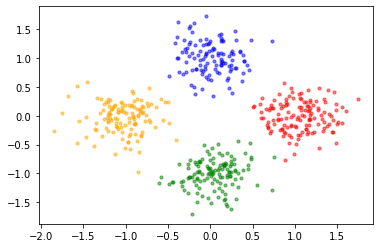

In [34]:
for i in range(1):
    bisecting_k_means(4, samples_500) # Run the algorithm with K=4 and data=samples_500

Comparing this plot to the plot we printed after sampling, we can say that the algorithm is pretty successful in clustering different components correctly. Due to the nature of sampling there are some samples from each cluster which are closer to the centroid of another cluster than to its own cluster. In such cases these irregular points are incorrectly clustered, but other than that the algorithm successfully determines the centroid and the focus of density within the clusters.

## References
1. [Support Vector Machine: Python implementation using CVXOPT](https://xavierbourretsicotte.github.io/SVM_implementation.html)
2. [Scikit-learn SVM](https://scikit-learn.org/stable/modules/svm.html)
3. [Generate Samples from Mixture](https://stats.stackexchange.com/a/70861)
4. [Sampling from Gaussian Mixture Model](https://medium.com/analytics-vidhya/sampling-from-gaussian-mixture-models-f1ab9cac2721)